# Analysing supermarkets sales data

<div><img src="https://angeliquepanagos.com//wp-content/uploads//2016/01//Superma-7660041_630x210.jpg" style="width: 1000px;"></div>

<b> Potential hypothesis: identify type of supermarket? Based on sales only </b>

## Steps
* Data collection
* Data exploration
* Data cleaning
* Data visualisation
* Building models
    * Model 1
    * Model 2
    * Model 3
* Conclusion

## Importing librairies

In [331]:
import pandas as pd
import numpy as np
from  datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Data collection

data from https://www.kaggle.com/devashish0507/big-mart-sales-prediction

In [579]:
df1=pd.read_csv("C:/Users/Camille/Documents/Ecole/Ironhack/Week 7/Project/train.csv")

In [580]:
df2=pd.read_csv("C:/Users/Camille/Documents/Ecole/Ironhack/Week 7/Project/test.csv")

In [581]:
df=pd.concat([df1,df2])

## Data exploration

In [582]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [583]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [584]:
df.shape

(14204, 12)

In [585]:
df["Item_Identifier"].nunique()

1559

In [339]:
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [340]:
df.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [341]:
df.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [342]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [343]:
df.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [344]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [345]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [346]:
pd.DataFrame(df.Outlet_Type.value_counts()).reset_index()

,index,Outlet_Type
0,Supermarket Type1,9294
1,Grocery Store,1805
2,Supermarket Type3,1559
3,Supermarket Type2,1546


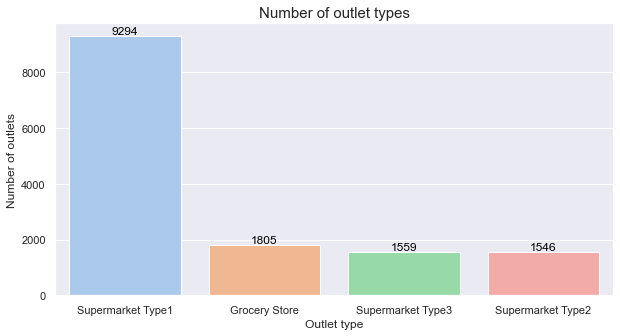

In [347]:
plt.figure(figsize=(10, 5))
#plt.xticks(rotation=60)
plt.title("Number of outlet types",fontsize=15)
outlets=sns.barplot(x="index", y="Outlet_Type", data=pd.DataFrame(df.Outlet_Type.value_counts()).reset_index(),palette=sns.color_palette("pastel",4))
plt.xlabel('Outlet type')
plt.ylabel('Number of outlets')
for p in outlets.patches:
        outlets.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

## Data cleaning

### Missing values

In [348]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [349]:
df.drop(["Item_Weight","Outlet_Size"],axis=1,inplace=True)

In [350]:
df.dropna(inplace=True)

In [351]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [352]:
df.shape

(8523, 10)

In [353]:
df.Outlet_Establishment_Year=2020-df.Outlet_Establishment_Year

In [354]:
# Cleaning Item Fat
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [355]:
dict_fat={"Low Fat":"LF","low fat":"LF","Regular":"reg"}

In [356]:
df.Item_Fat_Content=df.Item_Fat_Content.replace(dict_fat)

In [357]:
df.Item_Fat_Content.value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

## Data visualisation

In [358]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,21,Tier 1,Supermarket Type1,3735.1380
1,DRC01,reg,0.019278,Soft Drinks,48.2692,OUT018,11,Tier 3,Supermarket Type2,443.4228
2,FDN15,LF,0.016760,Meat,141.6180,OUT049,21,Tier 1,Supermarket Type1,2097.2700
3,FDX07,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,22,Tier 3,Grocery Store,732.3800
4,NCD19,LF,0.000000,Household,53.8614,OUT013,33,Tier 3,Supermarket Type1,994.7052


### General viz

#### Item type versus sales

In [359]:
df.groupby(["Item_Type"]).sum().reset_index().sort_values("Item_Outlet_Sales",ascending=False)

,Item_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
6,Fruits and Vegetables,84.407946,178124.0810,27449,2.820060e+06
13,Snack Foods,80.220267,175433.9204,26536,2.732786e+06
9,Household,55.803305,135976.5254,20216,2.055494e+06
5,Frozen Foods,56.192325,118558.8814,18811,1.825735e+06
4,Dairy,49.395349,101276.4596,15221,1.522594e+06
3,Canned,44.215926,90706.7270,14179,1.444151e+06
0,Baking Goods,44.821706,81894.7364,14432,1.265525e+06
8,Health and Hygiene,28.712309,68025.8388,11578,1.045200e+06
10,Meat,26.470620,59449.8638,9630,9.175656e+05
14,Soft Drinks,28.467650,58514.1650,9746,8.928977e+05


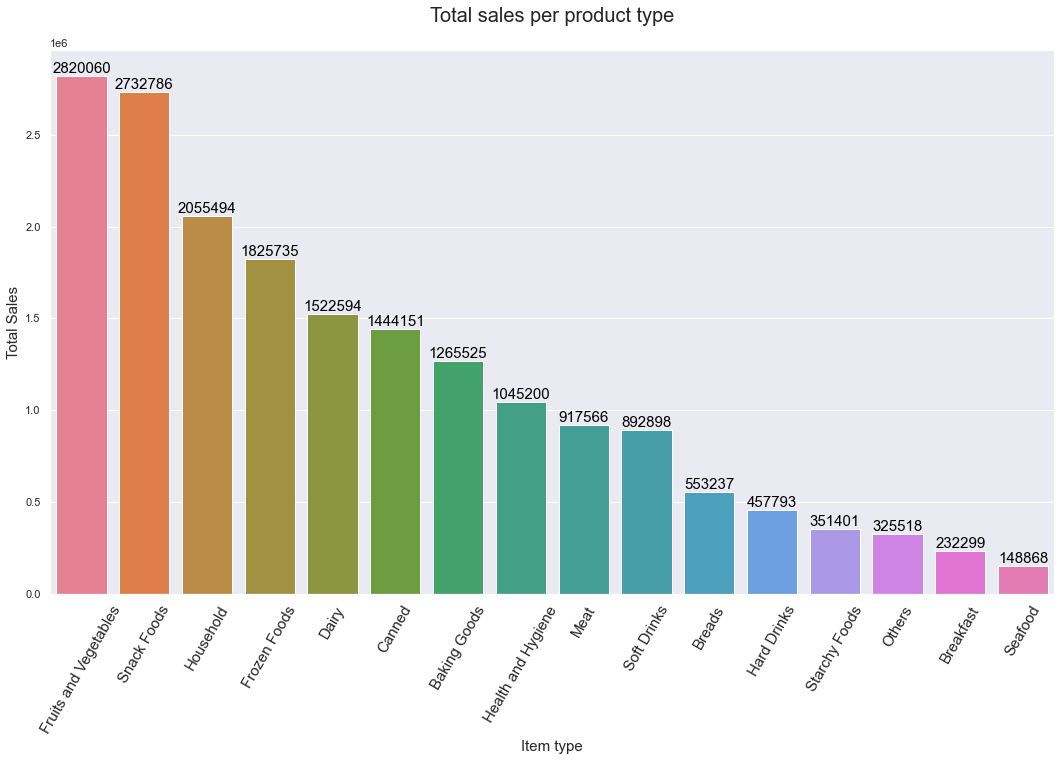

In [360]:
plt.figure(figsize=(18, 10))
plt.xticks(rotation=60, fontsize=15)
plt.title("Total sales per product type"+"\n",fontsize=20)
graph=sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df.groupby(["Item_Type"]).sum().reset_index().sort_values("Item_Outlet_Sales",ascending=False),palette=sns.color_palette("husl",16))
plt.xlabel('Item type',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)

In [361]:
### Checking fat content vs Item type

In [362]:
pd.crosstab(df.Item_Type,df.Item_Fat_Content,normalize="index").round(2).sort_values("LF",ascending=False)

Item_Fat_Content,LF,reg
Item_Type,,
Hard Drinks,1.00,0.00
Health and Hygiene,1.00,0.00
Household,1.00,0.00
Others,1.00,0.00
Soft Drinks,0.84,0.16
Dairy,0.61,0.39
Seafood,0.58,0.42
Snack Foods,0.58,0.42
Breads,0.56,0.44


Text(0, 0.5, 'Proportion of Fat content')

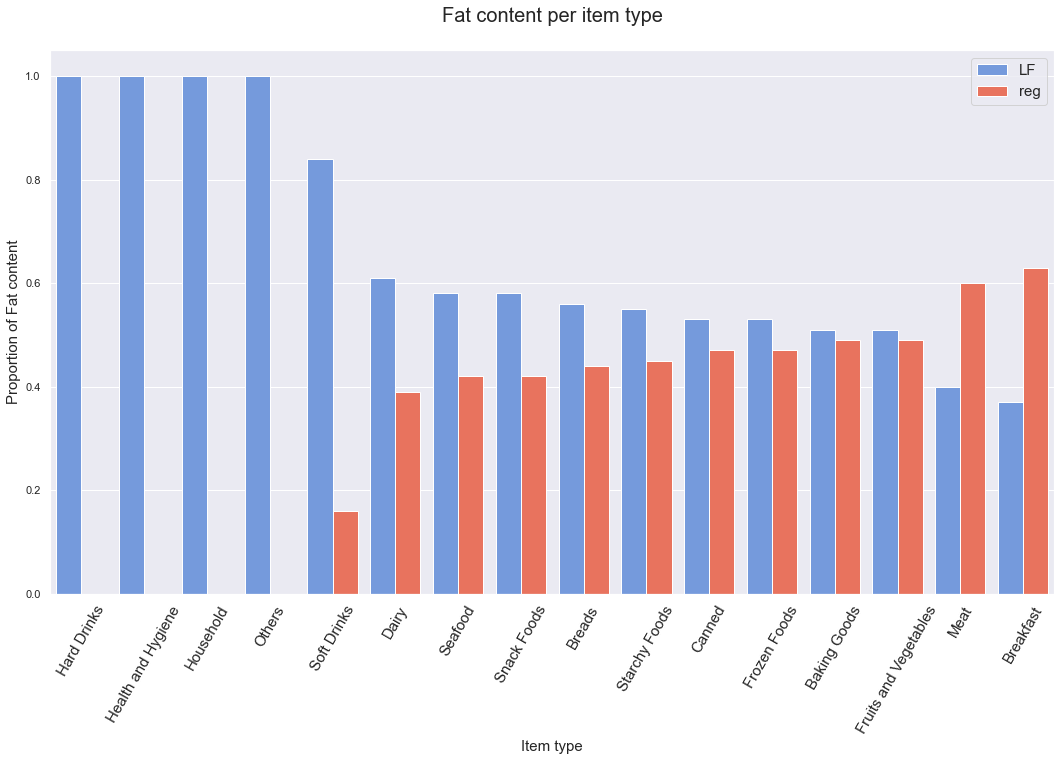

In [363]:
stacked = pd.crosstab(df.Item_Type,df.Item_Fat_Content,normalize="index").round(2).sort_values("LF",ascending=False).stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(18, 10))
plt.xticks(rotation=60, fontsize=15)
plt.title("Fat content per item type"+"\n",fontsize=20)
pltstacked=sns.barplot(x=stacked.Item_Type, y=stacked.value, hue=stacked.Item_Fat_Content,palette=['cornflowerblue','tomato'])
plt.legend(fontsize=15)
plt.xlabel('Item type',fontsize=15)
plt.ylabel('Proportion of Fat content',fontsize=15)

In [364]:
df.groupby(["Outlet_Location_Type"]).sum().reset_index().sort_values("Item_Outlet_Sales",ascending=True)

,Outlet_Location_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Tier 1,170.038072,336397.8120,59400,4.482059e+06
1,Tier 2,169.990299,393150.6416,43640,6.472314e+06
2,Tier 3,223.614910,472133.0272,85899,7.636753e+06


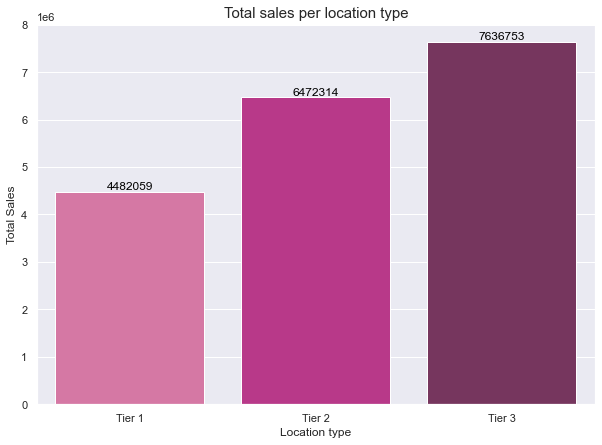

In [365]:
plt.figure(figsize=(10, 7))
#plt.xticks(rotation=60)
plt.title("Total sales per location type",fontsize=15)
total_city=sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df.groupby(["Outlet_Location_Type"]).sum().reset_index().sort_values("Item_Outlet_Sales",ascending=True),palette=reversed(sns.color_palette("RdPu_d",3)))
plt.xlabel('Location type')
plt.ylabel('Total Sales')
for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

### Viz for outlet type

In [366]:
pd.DataFrame(df.Outlet_Type.value_counts()).reset_index()

,index,Outlet_Type
0,Supermarket Type1,5577
1,Grocery Store,1083
2,Supermarket Type3,935
3,Supermarket Type2,928


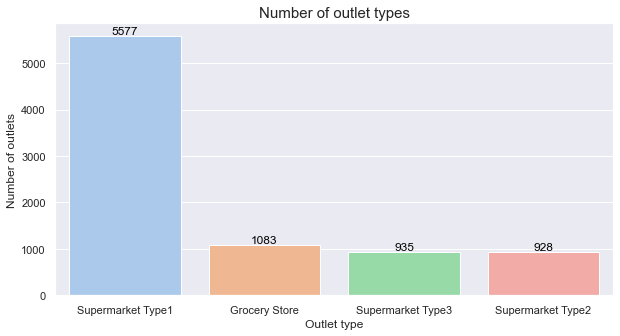

In [367]:
plt.figure(figsize=(10, 5))
#plt.xticks(rotation=60)
plt.title("Number of outlet types",fontsize=15)
outlets=sns.barplot(x="index", y="Outlet_Type", data=pd.DataFrame(df.Outlet_Type.value_counts()).reset_index(),palette=sns.color_palette("pastel",4))
plt.xlabel('Outlet type')
plt.ylabel('Number of outlets')
for p in outlets.patches:
        outlets.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

In [368]:
df.shape

(8523, 10)

#### Average age per outlet type

In [369]:
df.groupby(["Outlet_Type"]).mean().reset_index().sort_values("Outlet_Establishment_Year",ascending=False)

,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
3,Supermarket Type3,0.058615,139.801791,35.000000,3694.038558
0,Grocery Store,0.104862,140.294688,28.337950,339.828500
1,Supermarket Type1,0.060723,141.213894,20.677067,2316.181148
2,Supermarket Type2,0.061014,141.678634,11.000000,1995.498739


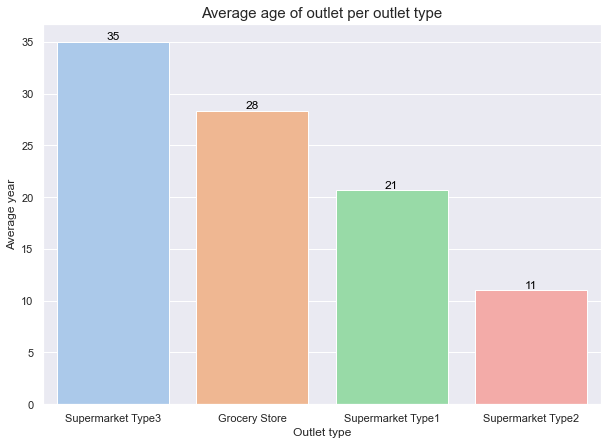

In [370]:
plt.figure(figsize=(10, 7))
#plt.xticks(rotation=60)
plt.title("Average age of outlet per outlet type",fontsize=15)
total_city=sns.barplot(x="Outlet_Type", y="Outlet_Establishment_Year", data=df.groupby(["Outlet_Type"]).mean().reset_index().sort_values("Outlet_Establishment_Year",ascending=False),palette=sns.color_palette("pastel",4))
plt.xlabel('Outlet type')
plt.ylabel('Average year')
for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

In [371]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,21,Tier 1,Supermarket Type1,3735.1380
1,DRC01,reg,0.019278,Soft Drinks,48.2692,OUT018,11,Tier 3,Supermarket Type2,443.4228
2,FDN15,LF,0.016760,Meat,141.6180,OUT049,21,Tier 1,Supermarket Type1,2097.2700
3,FDX07,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,22,Tier 3,Grocery Store,732.3800
4,NCD19,LF,0.000000,Household,53.8614,OUT013,33,Tier 3,Supermarket Type1,994.7052


#### Outlet_Location_Type vs Outlet Type

In [372]:
df.groupby(["Outlet_Type","Outlet_Location_Type"]).sum().reset_index().sort_values("Item_Outlet_Sales",ascending=False)

,Outlet_Type,Outlet_Location_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
3,Supermarket Type1,Tier 2,169.990299,393150.6416,43640,6.472314e+06
2,Supermarket Type1,Tier 1,112.781031,262590.2296,40920,4.302365e+06
6,Supermarket Type3,Tier 3,54.804764,130714.6746,32725,3.453926e+06
4,Supermarket Type1,Tier 3,55.879859,131809.0156,30756,2.142664e+06
5,Supermarket Type2,Tier 3,56.621454,131477.7724,10208,1.851823e+06
1,Grocery Store,Tier 3,56.308832,78131.5646,12210,1.883402e+05
0,Grocery Store,Tier 1,57.257041,73807.5824,18480,1.796941e+05


In [373]:
dflocation=pd.crosstab(df.Outlet_Type,df.Outlet_Location_Type).round(2)
dflocation

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


Text(0, 0.5, 'Number of outlets')

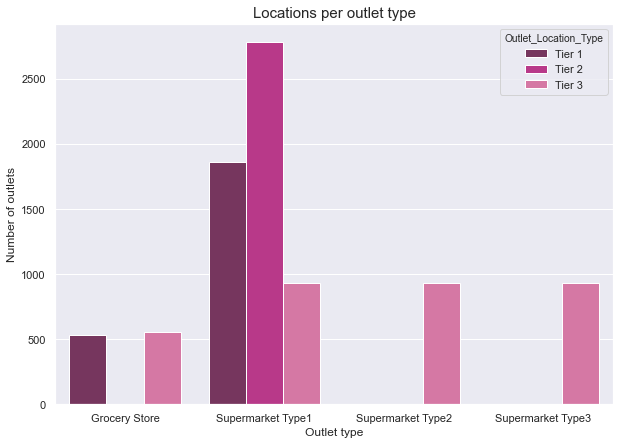

In [374]:
stacked = dflocation.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(10, 7))
plt.title("Locations per outlet type",fontsize=15)
pltstacked=sns.barplot(x=stacked.Outlet_Type, y=stacked.value, hue=stacked.Outlet_Location_Type,palette=("RdPu_d"))
plt.xlabel('Outlet type')
plt.ylabel('Number of outlets')

#### Outlet sales vs outlet type

In [375]:
df.groupby(["Outlet_Type"]).sum().reset_index().sort_values("Item_Outlet_Sales",ascending=False)

,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
1,Supermarket Type1,338.651189,787549.8868,115316,1.291734e+07
3,Supermarket Type3,54.804764,130714.6746,32725,3.453926e+06
2,Supermarket Type2,56.621454,131477.7724,10208,1.851823e+06
0,Grocery Store,113.565873,151939.1470,30690,3.680343e+05


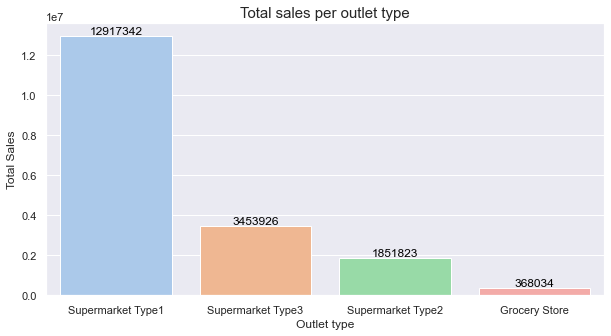

In [376]:
plt.figure(figsize=(10, 5))
#plt.xticks(rotation=60)
plt.title("Total sales per outlet type",fontsize=15)
total_city=sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df.groupby(["Outlet_Type"]).sum().reset_index().sort_values("Item_Outlet_Sales",ascending=False),palette=sns.color_palette("pastel",4))
plt.xlabel('Outlet type')
plt.ylabel('Total Sales')
for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

#### Product sales per outlet type

In [377]:
df_productsales=df.groupby(["Outlet_Type","Item_Type"]).sum().sort_values("Item_Outlet_Sales",ascending=False)
df_productsales

Item_Visibility     Item_MRP  \
Outlet_Type       Item_Type                                             
Supermarket Type1 Fruits and Vegetables        50.851078  117431.9880   
                  Snack Foods                  48.739841  114296.1302   
                  Household                    33.165874   89143.4092   
                  Frozen Foods                 35.332514   79348.3770   
                  Dairy                        29.414476   67179.6940   
...                                                  ...          ...   
Grocery Store     Breakfast                     2.512724    2793.5128   
                  Others                        2.367408    3467.2652   
                  Hard Drinks                   2.461681    2812.5444   
                  Starchy Foods                 1.744041    1925.9988   
                  Seafood                       1.103333    1438.1622   

                                         Outlet_Establishment_Year  \
Outlet_Type       Item_Type                                          
Supermarket Type1 Fruits and Vegetables                      16771   
                  Snack Foods                                16102   
                  Household                                  12412   
                  Frozen Foods                               11781   
                  Dairy                                       9412   
...                                                            ...   
Grocery Store     Breakfast                                    548   
                  Others                                       815   
                  Hard Drinks                                  632   
                  Starchy Foods                                338   
                  Seafood                                      298   

                                         Item_Outlet_Sales  
Outlet_Type       Item_Type                                 
Supermarket Type1 Fruits and Vegetables       1.931958e+06  
                  Snack Foods                 1.889387e+06  
                  Household                   1.437220e+06  
                  Frozen Foods                1.292668e+06  
                  Dairy                       1.076694e+06  
...                                                    ...  
Grocery Store     Breakfast                   7.843790e+03  
                  Others                      7.778541e+03  
                  Hard Drinks                 5.835737e+03  
                  Starchy Foods               3.901588e+03  
                  Seafood                     2.284360e+03  

[64 rows x 4 columns]

In [378]:
df_productsales2=df_productsales.reset_index()

In [379]:
df_productsales2.Item_Type.nunique()

16

In [380]:
df_productsales2

,Outlet_Type,Item_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Supermarket Type1,Fruits and Vegetables,50.851078,117431.9880,16771,1.931958e+06
1,Supermarket Type1,Snack Foods,48.739841,114296.1302,16102,1.889387e+06
2,Supermarket Type1,Household,33.165874,89143.4092,12412,1.437220e+06
3,Supermarket Type1,Frozen Foods,35.332514,79348.3770,11781,1.292668e+06
4,Supermarket Type1,Dairy,29.414476,67179.6940,9412,1.076694e+06
...,...,...,...,...,...,...
59,Grocery Store,Breakfast,2.512724,2793.5128,548,7.843790e+03
60,Grocery Store,Others,2.367408,3467.2652,815,7.778541e+03
61,Grocery Store,Hard Drinks,2.461681,2812.5444,632,5.835737e+03
62,Grocery Store,Starchy Foods,1.744041,1925.9988,338,3.901588e+03


In [381]:
df_productsales2_Type1=df_productsales2.loc[df_productsales2.Outlet_Type=="Supermarket Type1"]
df_productsales2_Type2=df_productsales2.loc[df_productsales2.Outlet_Type=="Supermarket Type2"]
df_productsales2_Type3=df_productsales2.loc[df_productsales2.Outlet_Type=="Supermarket Type3"]
df_productsales2_Grocery=df_productsales2.loc[df_productsales2.Outlet_Type=="Grocery Store"]

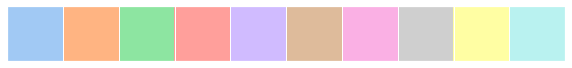

In [382]:
sns.palplot(sns.color_palette("pastel")) # blues, oranges, greens, reds

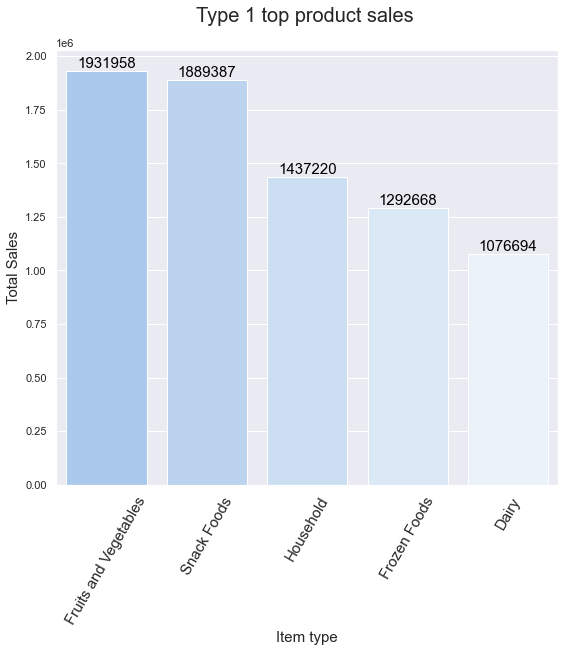

In [383]:
plt.figure(figsize=(9, 8))
plt.xticks(rotation=60,fontsize=15)
plt.title("Type 1 top product sales "+"\n",fontsize=20)
total_city=sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_productsales2_Type1.head(5),palette=reversed(sns.light_palette("#A1C9F4",5)))
plt.xlabel('Item type',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)

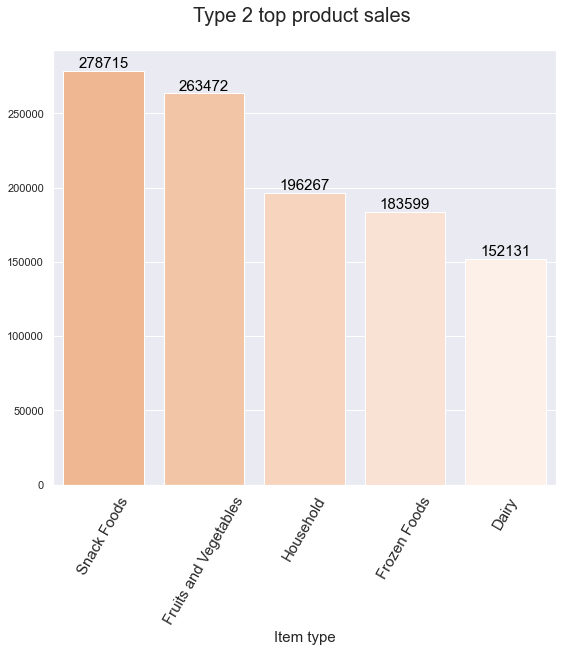

In [384]:
plt.figure(figsize=(9, 8))
plt.xticks(rotation=60,fontsize=15)
plt.title("Type 2 top product sales "+"\n",fontsize=20)
total_city=sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_productsales2_Type2.head(5),palette=reversed(sns.light_palette("#FFB482",5)))
plt.xlabel('Item type',fontsize=15)
plt.ylabel(None)
for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)

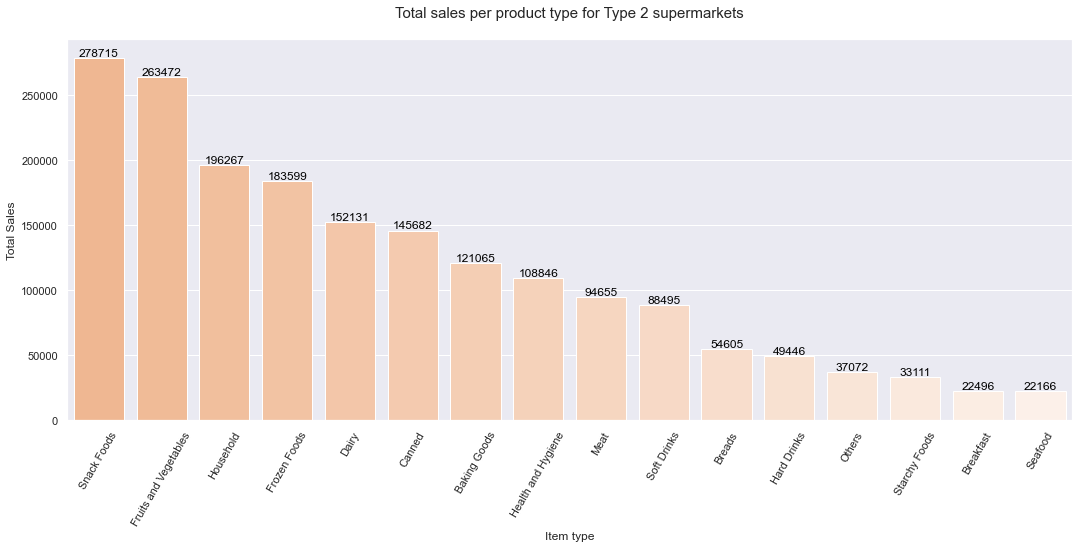

In [385]:
plt.figure(figsize=(18, 7))
plt.xticks(rotation=60)
plt.title("Total sales per product type for Type 2 supermarkets"+"\n",fontsize=15)
total_city=sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_productsales2_Type2,palette=reversed(sns.light_palette("#FFB482",16)))
plt.xlabel('Item type')
plt.ylabel('Total Sales')
for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

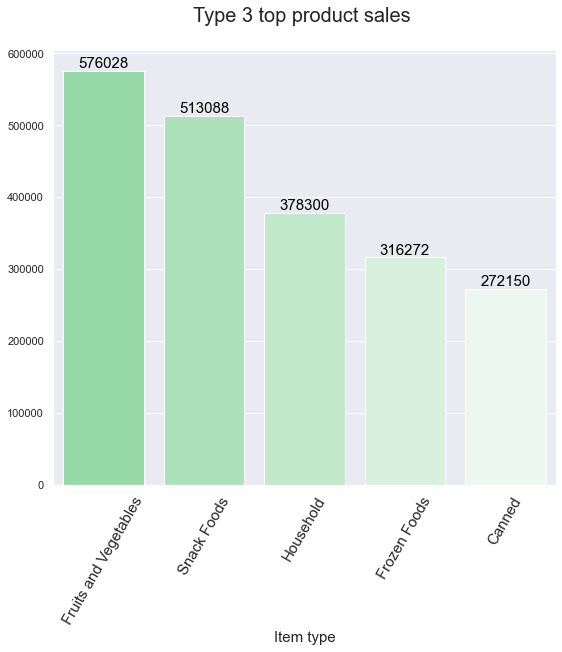

In [386]:
plt.figure(figsize=(9, 8))
plt.xticks(rotation=60,fontsize=15)
plt.title("Type 3 top product sales "+"\n",fontsize=20)
total_city=sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_productsales2_Type3.head(5),palette=reversed(sns.light_palette("#8DE5A1",5)))
plt.xlabel('Item type',fontsize=15)
plt.ylabel(None)
for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)

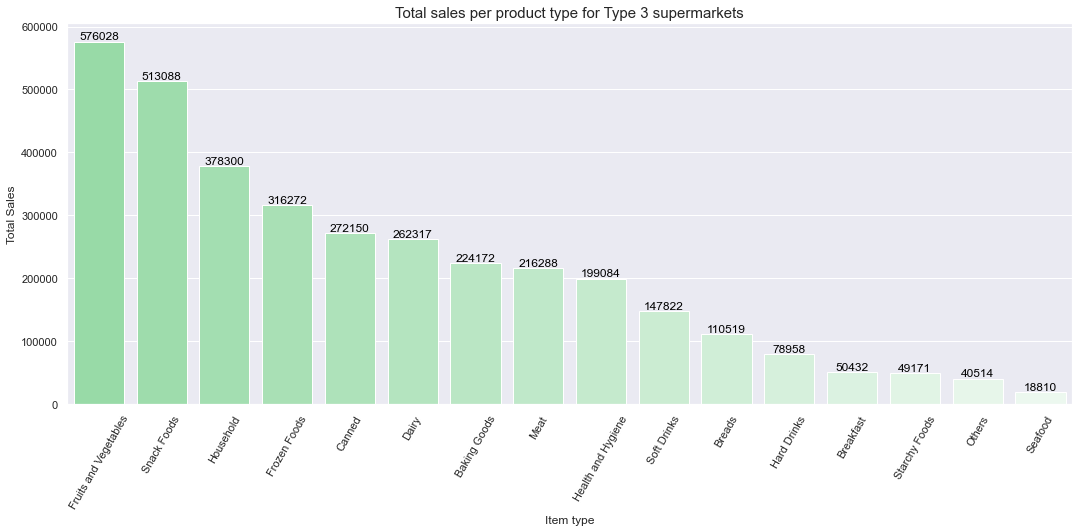

In [387]:
plt.figure(figsize=(18, 7))
plt.xticks(rotation=60)
plt.title("Total sales per product type for Type 3 supermarkets",fontsize=15)
total_city=sns.barplot(x="Item_Type", y="Item_Outlet_Sales",data=df_productsales2_Type3,palette=reversed(sns.light_palette("#8DE5A1",16)))
plt.xlabel('Item type')
plt.ylabel('Total Sales')

for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

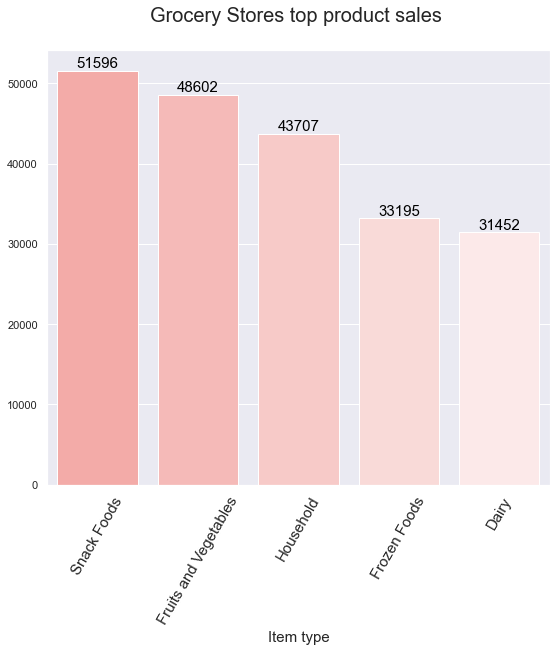

In [388]:
plt.figure(figsize=(9, 8))
plt.xticks(rotation=60,fontsize=15)
plt.title("Grocery Stores top product sales "+"\n",fontsize=20)
total_city=sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_productsales2_Grocery.head(5),palette=reversed(sns.light_palette("#FF9F9B",5)))
plt.xlabel('Item type',fontsize=15)
plt.ylabel(None)
for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)

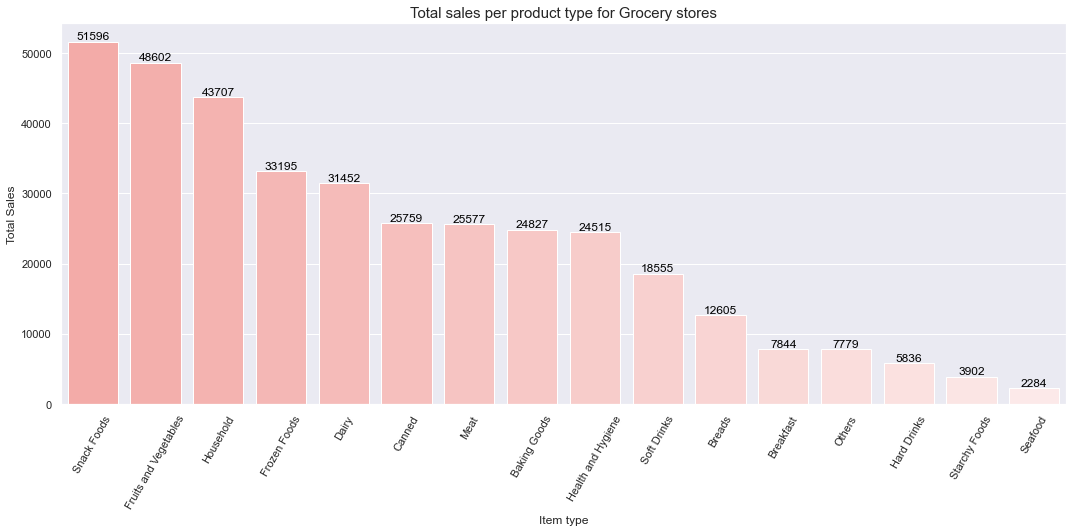

In [389]:
plt.figure(figsize=(18, 7))
plt.xticks(rotation=60)
plt.title("Total sales per product type for Grocery stores",fontsize=15)
total_city=sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=df_productsales2_Grocery,palette=reversed(sns.light_palette("#FF9F9B",16)))
plt.xlabel('Item type')
plt.ylabel('Total Sales')

for p in total_city.patches:
        total_city.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

#### Item visibility

In [566]:
df.groupby(["Outlet_Type"]).mean().reset_index().sort_values("Item_Visibility",ascending=False)

,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Grocery Store,0.104862,140.294688,3.720558,339.828500
2,Supermarket Type2,0.061014,141.678634,2.602913,1995.498739
1,Supermarket Type1,0.060723,141.213894,3.310113,2316.181148
3,Supermarket Type3,0.058615,139.801791,4.018361,3694.038558


Text(0, 0.5, 'Item visibility')

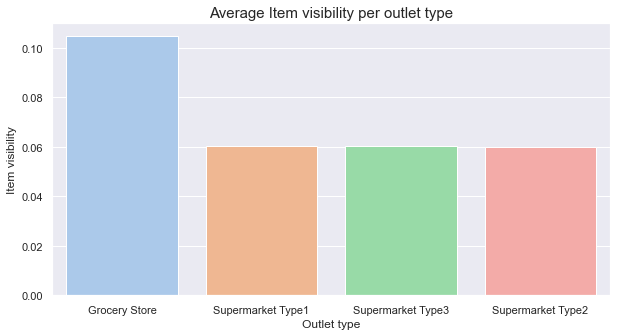

In [586]:
plt.figure(figsize=(10, 5))
plt.title("Average Item visibility per outlet type",fontsize=15)
total_city=sns.barplot(x="Outlet_Type", y="Item_Visibility", data=df.groupby(["Outlet_Type"]).mean().reset_index().sort_values("Item_Visibility",ascending=False),palette=sns.color_palette("pastel",4))
plt.xlabel('Outlet type')
plt.ylabel('Item visibility')

In [570]:
df_productvis=df.groupby(["Outlet_Type","Item_Type"]).mean().sort_values("Item_Visibility",ascending=False)
df_productvis

Item_Visibility    Item_MRP  \
Outlet_Type       Item_Type                                         
Grocery Store     Starchy Foods              0.134157  148.153754   
                  Breakfast                  0.132249  147.026989   
                  Baking Goods               0.121518  126.438068   
                  Dairy                      0.118935  147.166715   
                  Seafood                    0.110333  143.816220   
...                                               ...         ...   
Supermarket Type1 Health and Hygiene         0.051180  131.494766   
Supermarket Type3 Starchy Foods              0.050326  143.078386   
Supermarket Type2 Others                     0.050069  127.813340   
Supermarket Type3 Health and Hygiene         0.048012  127.852417   
Supermarket Type2 Health and Hygiene         0.047908  126.550410   

                                      Outlet_Establishment_Year  \
Outlet_Type       Item_Type                                       
Grocery Store     Starchy Foods                        3.616049   
                  Breakfast                            3.743095   
                  Baking Goods                         3.731221   
                  Dairy                                3.746752   
                  Seafood                              3.785914   
...                                                         ...   
Supermarket Type1 Health and Hygiene                   3.315542   
Supermarket Type3 Starchy Foods                        4.018361   
Supermarket Type2 Others                               2.602913   
Supermarket Type3 Health and Hygiene                   4.018361   
Supermarket Type2 Health and Hygiene                   2.602913   

                                      Item_Outlet_Sales  
Outlet_Type       Item_Type                              
Grocery Store     Starchy Foods              300.122154  
                  Breakfast                  412.831042  
                  Baking Goods               292.082544  
                  Dairy                      341.866589  
                  Seafood                    228.435980  
...                                                 ...  
Supermarket Type1 Health and Hygiene        2127.626505  
Supermarket Type3 Starchy Foods             3512.190114  
Supermarket Type2 Others                    1853.620490  
Supermarket Type3 Health and Hygiene        3318.069783  
Supermarket Type2 Health and Hygiene        1876.649134  

[64 rows x 4 columns]

In [572]:
df_productvis2=df_productvis.reset_index()

In [573]:
df_productvis2_Type1=df_productvis2.loc[df_productvis2.Outlet_Type=="Supermarket Type1"]
df_productvis2_Type2=df_productvis2.loc[df_productvis2.Outlet_Type=="Supermarket Type2"]
df_productvis2_Type3=df_productvis2.loc[df_productvis2.Outlet_Type=="Supermarket Type3"]
df_productvis2_Grocery=df_productvis2.loc[df_productvis2.Outlet_Type=="Grocery Store"]

Text(0, 0.5, 'Average visibility')

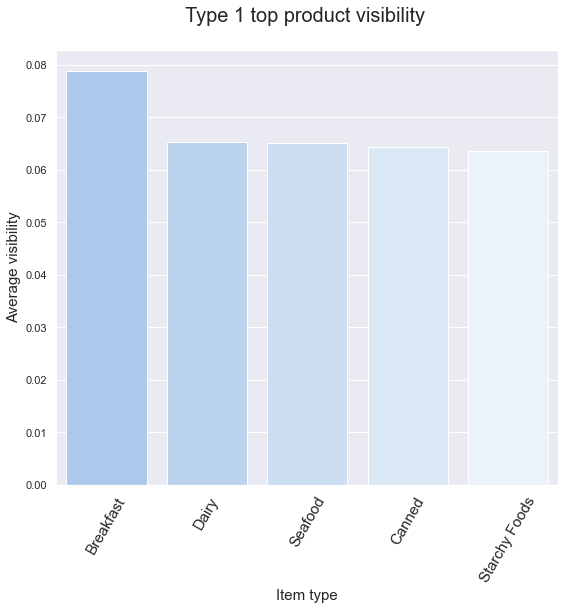

In [575]:
plt.figure(figsize=(9, 8))
plt.xticks(rotation=60,fontsize=15)
plt.title("Type 1 top product visibility "+"\n",fontsize=20)
graph=sns.barplot(x="Item_Type", y="Item_Visibility", data=df_productvis2_Type1.head(5),palette=reversed(sns.light_palette("#A1C9F4",5)))
plt.xlabel('Item type',fontsize=15)
plt.ylabel('Average visibility',fontsize=15)

Text(0, 0.5, 'Average visibility')

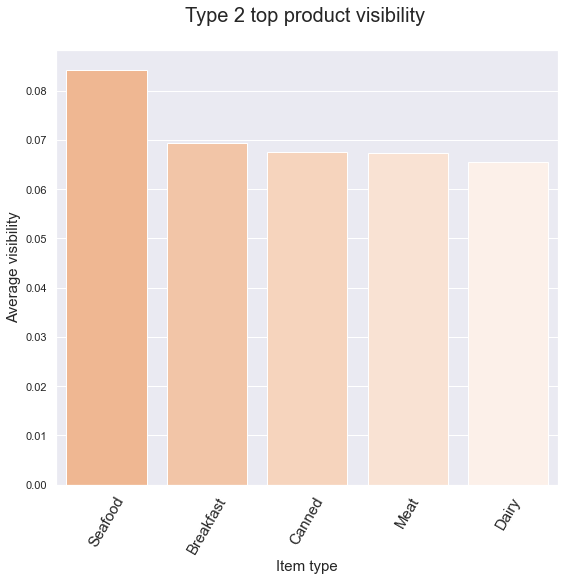

In [576]:
plt.figure(figsize=(9, 8))
plt.xticks(rotation=60,fontsize=15)
plt.title("Type 2 top product visibility "+"\n",fontsize=20)
graph=sns.barplot(x="Item_Type", y="Item_Visibility", data=df_productvis2_Type2.head(5),palette=reversed(sns.light_palette("#FFB482",5)))
plt.xlabel('Item type',fontsize=15)
plt.ylabel('Average visibility',fontsize=15)

Text(0, 0.5, 'Average visibility')

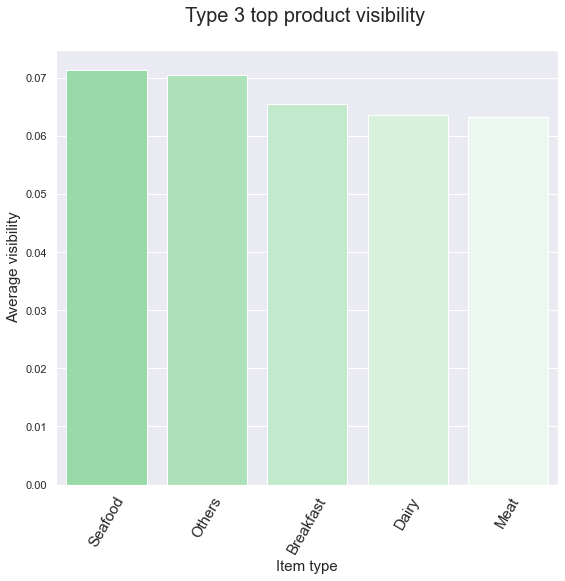

In [577]:
plt.figure(figsize=(9, 8))
plt.xticks(rotation=60,fontsize=15)
plt.title("Type 3 top product visibility "+"\n",fontsize=20)
graph=sns.barplot(x="Item_Type", y="Item_Visibility", data=df_productvis2_Type3.head(5),palette=reversed(sns.light_palette("#8DE5A1",5)))
plt.xlabel('Item type',fontsize=15)
plt.ylabel('Average visibility',fontsize=15)

Text(0, 0.5, 'Average visibility')

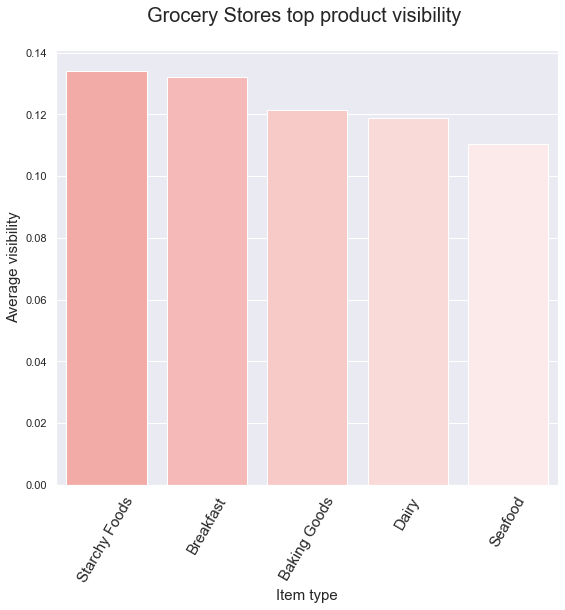

In [578]:
plt.figure(figsize=(9, 8))
plt.xticks(rotation=60,fontsize=15)
plt.title("Grocery Stores top product visibility "+"\n",fontsize=20)
graph=sns.barplot(x="Item_Type", y="Item_Visibility", data=df_productvis2_Grocery.head(5),palette=reversed(sns.light_palette("#FF9F9B",5)))
plt.xlabel('Item type',fontsize=15)
plt.ylabel('Average visibility',fontsize=15)

## Data transformation for analysis

* Drop "Item_Identifier","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Location_Type"
* Categorize Item Fat Content, Item Type, Outlet Type
* Standardize Sales & Item Visibility

### Identify which columns to drop based on correlation

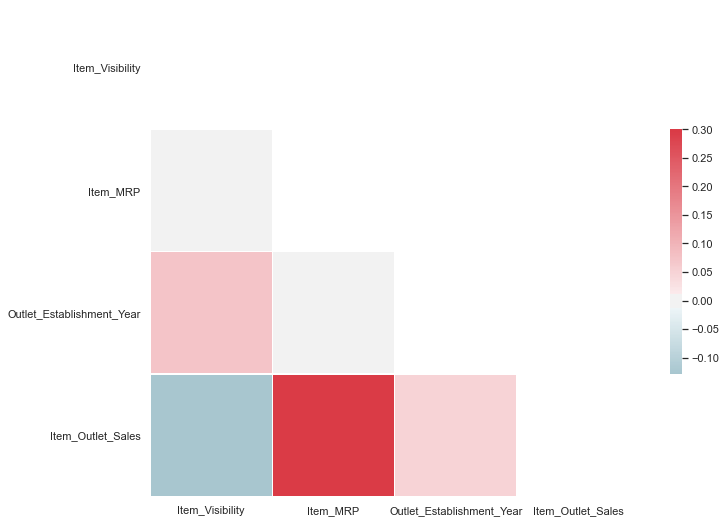

In [390]:
sns.set(style="white")

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [391]:
df.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,-0.001315,1.000000,-0.005020,0.567574
Outlet_Establishment_Year,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,-0.128625,0.567574,0.049135,1.000000


### Dropping columns

Getting rid of all outlet identifiers

In [392]:
lst_drop=["Item_Identifier","Item_MRP","Outlet_Identifier"]

In [393]:
df2=df.drop(lst_drop,axis=1)

In [394]:
df2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,LF,0.016047,Dairy,21,Tier 1,Supermarket Type1,3735.1380
1,reg,0.019278,Soft Drinks,11,Tier 3,Supermarket Type2,443.4228
2,LF,0.016760,Meat,21,Tier 1,Supermarket Type1,2097.2700
3,reg,0.000000,Fruits and Vegetables,22,Tier 3,Grocery Store,732.3800
4,LF,0.000000,Household,33,Tier 3,Supermarket Type1,994.7052


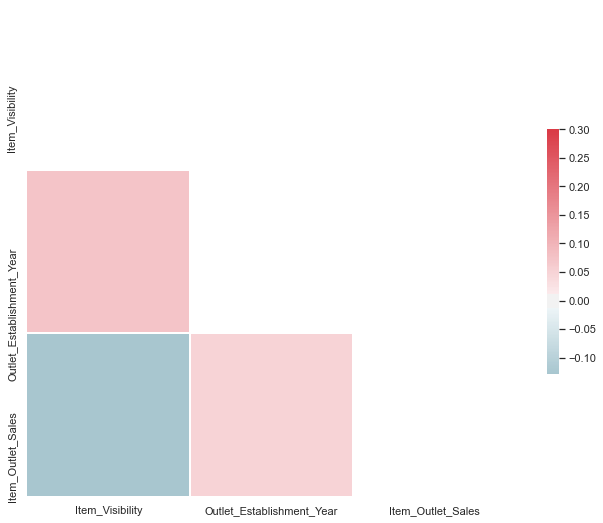

In [396]:
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df2.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Categorising columns

In [397]:
df2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,LF,0.016047,Dairy,21,Tier 1,Supermarket Type1,3735.1380
1,reg,0.019278,Soft Drinks,11,Tier 3,Supermarket Type2,443.4228
2,LF,0.016760,Meat,21,Tier 1,Supermarket Type1,2097.2700
3,reg,0.000000,Fruits and Vegetables,22,Tier 3,Grocery Store,732.3800
4,LF,0.000000,Household,33,Tier 3,Supermarket Type1,994.7052


In [398]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()

df2.Item_Fat_Content=le1.fit_transform(df2.Item_Fat_Content)
df2.Item_Type=le1.fit_transform(df2.Item_Type)
df2.Outlet_Establishment_Year=le1.fit_transform(df2.Outlet_Establishment_Year)
df2.Outlet_Location_Type=le1.fit_transform(df2.Outlet_Location_Type)
df2.Outlet_Type=le1.fit_transform(df2.Outlet_Type)

In [399]:
df2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,4,4,0,1,3735.1380
1,1,0.019278,14,0,2,2,443.4228
2,0,0.016760,10,4,0,1,2097.2700
3,1,0.000000,6,5,2,0,732.3800
4,0,0.000000,9,7,2,1,994.7052


### Standardizing

In [400]:
from scipy.stats import boxcox

In [401]:
df_standardize3, lambda3 = boxcox(df.Outlet_Establishment_Year)

In [402]:
df.Outlet_Establishment_Year = boxcox(df.Outlet_Establishment_Year, lambda3)

#### Item visibility

In [403]:
sns.set()

Text(0.5, 1.0, 'Distribution of Item visibility')

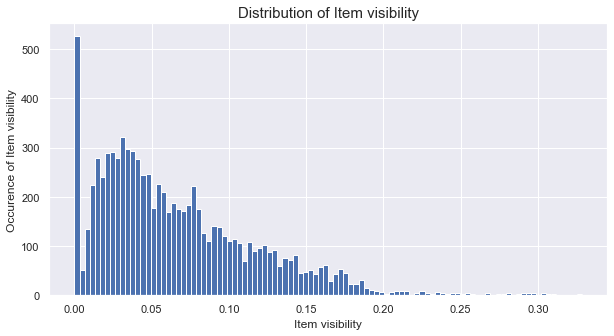

In [404]:
#Item visibility
df2.Item_Visibility.hist(bins=100,figsize=(10,5))
plt.ylabel("Occurence of Item visibility")
plt.xlabel("Item visibility")
plt.title("Distribution of Item visibility", fontsize=15)

In [405]:
df2=df2.loc[df.Item_Visibility>0]

In [406]:
df2.Item_Visibility

0       0.016047
1       0.019278
2       0.016760
6       0.012741
7       0.127470
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 7997, dtype: float64

In [407]:
df_standardize2, lambda2 = boxcox(df2.Item_Visibility)

In [408]:
lambda2

0.2250980813773832

In [409]:
df2.Item_Visibility = boxcox(df2.Item_Visibility, lambda2)

Text(0.5, 1.0, 'Distribution of Item visibility - transformed')

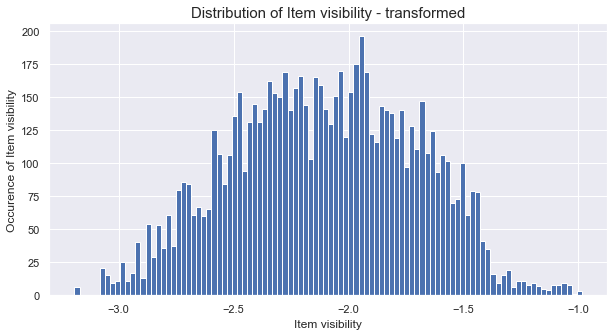

In [410]:
df2.Item_Visibility.hist(bins=100,figsize=(10,5))
plt.ylabel("Occurence of Item visibility")
plt.xlabel("Item visibility")
plt.title("Distribution of Item visibility - transformed", fontsize=15)

#### Sales

Text(0.5, 1.0, 'Distribution of sales')

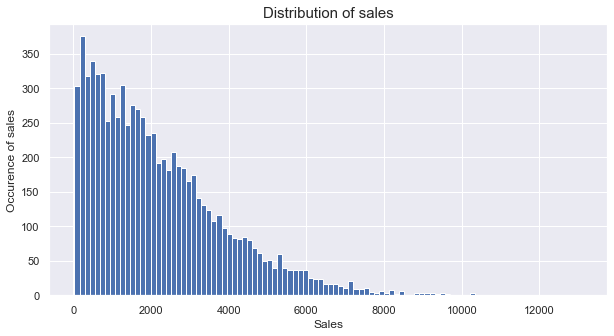

In [411]:
#Sales
df2.Item_Outlet_Sales.hist(bins=100, figsize=(10,5))
plt.ylabel("Occurence of sales")
plt.xlabel("Sales")
plt.title("Distribution of sales", fontsize=15)

In [412]:
df_standardize, lambda1 = boxcox(df2.Item_Outlet_Sales)

In [413]:
lambda1

0.3460839465279352

In [414]:
df2.Item_Outlet_Sales = boxcox(df2.Item_Outlet_Sales, lambda1)

Text(0.5, 1.0, 'Distribution of sales - transformed')

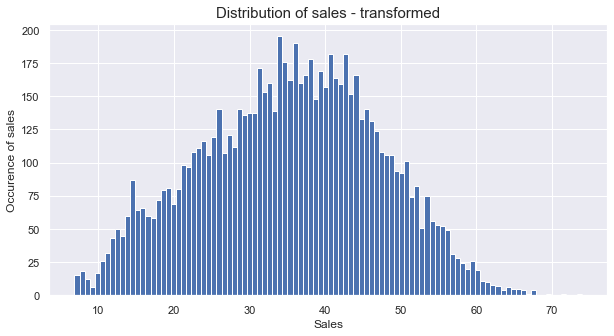

In [415]:
#Sales
df2.Item_Outlet_Sales.hist(bins=100, figsize=(10,5))
plt.ylabel("Occurence of sales")
plt.xlabel("Sales")
plt.title("Distribution of sales - transformed", fontsize=15)

### Identifying outliers

#### Item visibility 

Text(0.5, 1.0, 'Item_Visibility outliers')

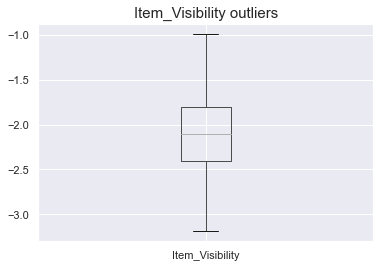

In [416]:
df2.boxplot(column=['Item_Visibility'])
plt.title("Item_Visibility outliers", fontsize=15)

#### Sales

Text(0.5, 1.0, 'Sales outliers')

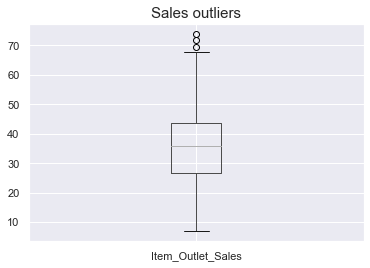

In [417]:
df2.boxplot(column=['Item_Outlet_Sales'])
plt.title("Sales outliers", fontsize=15)

In [418]:
Q1_income= df2.Item_Outlet_Sales.quantile(0.25)
Q3_income= df2.Item_Outlet_Sales.quantile(0.75)
IQR_income = Q3_income - Q1_income
Outlierbottom_income=Q1_income-IQR_income*1.5
Outliertop_income=Q3_income+IQR_income*1.5

In [419]:
df2.loc[(df2.Item_Outlet_Sales<Outlierbottom_income)|(df2.Item_Outlet_Sales>Outliertop_income)]

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4349,0,-1.866412,13,8,2,3,69.453013
5223,1,-2.734981,6,8,2,3,71.931438
7188,0,-2.847823,9,8,2,3,73.951068


In [420]:
df2=df2.loc[(df2.Item_Outlet_Sales>Outlierbottom_income)|(df2.Item_Outlet_Sales<Outliertop_income)]

In [421]:
df2.shape

(7997, 7)

In [422]:
lst_drop2=["Outlet_Location_Type","Outlet_Establishment_Year"]

In [424]:
df3=df2.drop(lst_drop2,axis=1)

## Analysis

In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

### Splitting the dataset

In [426]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop("Outlet_Type",axis=1),df3.Outlet_Type, test_size=0.3,random_state=42,stratify=df3.Outlet_Type)

In [549]:
def sort_accuracy_score(X_train,X_test,y_train,y_test):
    model_list=[LogisticRegression,KNeighborsClassifier,RandomForestClassifier,DecisionTreeClassifier,AdaBoostClassifier,xgb.XGBClassifier,GaussianNB]
    model_list_str=["LogisticRegression","KNeighborsClassifier - distance","KNeighborsClassifier - uniform","RandomForestClassifier","DecisionTreeClassifier","AdaBoostClassifier","XGBClassifier","GaussianNB"]
    ls_model=[]
    l_acc=[]
    l_pred=[]

    for model in model_list:
        if model == LogisticRegression:
            model2=model(multi_class="multinomial",max_iter=10000).fit(X_train, y_train)
            ls_model.append(model2)
            y_pred2=model2.predict(X_test)
            l_pred.append(y_pred2)
            l_acc.append(accuracy_score(y_test,y_pred2))

        elif model == KNeighborsClassifier:
            model2=model(n_neighbors=3, weights="distance").fit(X_train, y_train)
            ls_model.append(model2)
            y_pred2=model2.predict(X_test)
            l_pred.append(y_pred2)
            l_acc.append(accuracy_score(y_test,y_pred2))

            model2=model(n_neighbors=3, weights="uniform").fit(X_train, y_train)
            ls_model.append(model2)
            y_pred2=model2.predict(X_test)
            l_pred.append(y_pred2)
            l_acc.append(accuracy_score(y_test,y_pred2))

        else:
            model2=model().fit(X_train, y_train)
            ls_model.append(model2)
            y_pred2=model2.predict(X_test)
            l_pred.append(y_pred2)
            l_acc.append(accuracy_score(y_test,y_pred2))
        
    return pd.DataFrame(l_acc,model_list_str,columns=["Accuracy_Score"]).sort_values("Accuracy_Score",ascending=False)

In [550]:
sort_accuracy_score(X_train,X_test,y_train,y_test)

,Accuracy_Score
LogisticRegression,0.733333
GaussianNB,0.730417
AdaBoostClassifier,0.730000
XGBClassifier,0.720000
RandomForestClassifier,0.690000
KNeighborsClassifier - uniform,0.675417
KNeighborsClassifier - distance,0.630833
DecisionTreeClassifier,0.579167


In [563]:
def confusion_matrix(model,X_train,X_test,y_train,y_test):
    if model == LogisticRegression:
        model2=model(multi_class="multinomial",max_iter=10000).fit(X_train, y_train)
        y_pred2=model2.predict(X_test)
        matrix=confusion_matrix(y_test,y_pred2)
        print("The confusion matrix of",model,"is:")
        return matrix

    else:
        model2=model().fit(X_train, y_train)
        y_pred2=model2.predict(X_test)
        matrix=confusion_matrix(y_test,y_pred2)
        print("The confusion matrix of",model,"is:")
        return matrix

### 1. Logistic Regression

In [504]:
model1= LogisticRegression(multi_class="multinomial",max_iter=10000)
model1.fit(X_train, y_train)
pred1=model1.predict(X_test)
print(confusion_matrix(y_test,pred1),accuracy_score(y_test,pred1))

[[ 239   68    0    0]
 [  56 1511    0    4]
 [  12  247    0    0]
 [   0  253    0   10]] 0.7333333333333333


### 2. KNeighbors

In [487]:
model2= KNeighborsClassifier(n_neighbors=3, weights="distance")
model2.fit(X_train, y_train)
pred2=model2.predict(X_test)
print(confusion_matrix(y_test,pred2),accuracy_score(y_test,pred2))

[[ 219   76   12    0]
 [  68 1249  138  116]
 [  12  218   17   12]
 [   3  220   11   29]] 0.6308333333333334


In [486]:
model2= KNeighborsClassifier(n_neighbors=3, weights="uniform")
model2.fit(X_train, y_train)
pred2=model2.predict(X_test)
print(confusion_matrix(y_test,pred2),accuracy_score(y_test,pred2))

[[ 235   67    5    0]
 [  99 1355   45   72]
 [  22  227    5    5]
 [   3  230    4   26]] 0.6754166666666667


### 3. Decision Tree

In [429]:
model3= DecisionTreeClassifier()
model3.fit(X_train, y_train)
pred3=model3.predict(X_test)
print(confusion_matrix(y_test,pred3),accuracy_score(y_test,pred3))

[[ 220   59   25    3]
 [  77 1123  201  170]
 [  15  196   26   22]
 [   5  188   26   44]] 0.58875


### 4. Random Forest

In [430]:
model4= RandomForestClassifier()
model4.fit(X_train, y_train)
pred4=model4.predict(X_test)
print(confusion_matrix(y_test,pred4),accuracy_score(y_test,pred4))

[[ 235   67    5    0]
 [  52 1415   49   55]
 [  10  238    4    7]
 [   3  244    1   15]] 0.6954166666666667


### 5. Ada Boost

In [431]:
model5= AdaBoostClassifier()
model5.fit(X_train, y_train)
pred5=model5.predict(X_test)
print(confusion_matrix(y_test,pred5),accuracy_score(y_test,pred5))

[[ 240   67    0    0]
 [  59 1512    0    0]
 [  16  243    0    0]
 [   3  260    0    0]] 0.73


### 6. XGBoost

In [432]:
model6= xgb.XGBClassifier()
model6.fit(X_train, y_train)
pred6=model6.predict(X_test)
pred6=pred6.round()
print(confusion_matrix(y_test,pred6),accuracy_score(y_test,pred6))

[[ 242   64    1    0]
 [  53 1472    6   40]
 [  10  243    2    4]
 [   2  247    2   12]] 0.72


### 7. Gaussian

In [433]:
model7= GaussianNB()
model7.fit(X_train, y_train)
pred7=model7.predict(X_test)
print(confusion_matrix(y_test,pred7),accuracy_score(y_test,pred7))

[[ 248   59    0    0]
 [  73 1493    0    5]
 [  15  244    0    0]
 [   4  247    0   12]] 0.7304166666666667


In [435]:
df3.corr()

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,1.000000,0.057280,-0.140911,0.007055,0.017084
Item_Visibility,0.057280,1.000000,-0.046662,-0.150092,-0.151111
Item_Type,-0.140911,-0.046662,1.000000,0.003875,0.016971
Outlet_Type,0.007055,-0.150092,0.003875,1.000000,0.459754
Item_Outlet_Sales,0.017084,-0.151111,0.016971,0.459754,1.000000


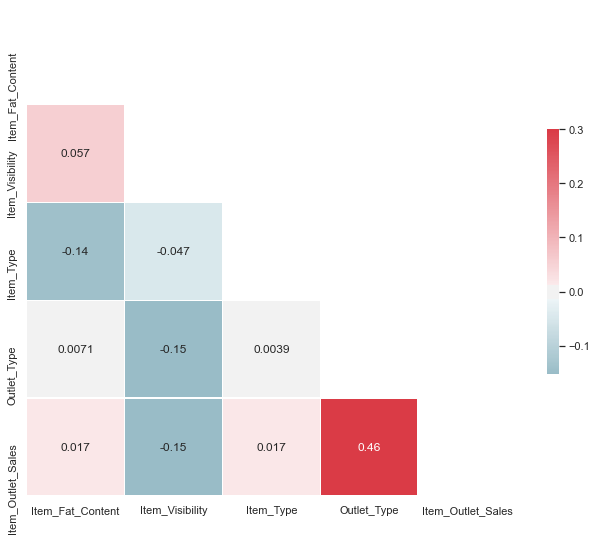

In [436]:
sns.set(style="white")
mask = np.triu(np.ones_like(df3.corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df3.corr(), annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Check 2 R²

#### First model

In [437]:
import sklearn.metrics

In [438]:
y_pred1=model1.predict(X_train)

In [439]:
sklearn.metrics.r2_score(y_train,y_pred1)

0.019013107848979915

In [440]:
y_pred1_=model1.predict(X_test)

In [441]:
sklearn.metrics.r2_score(y_test,y_pred1_)

0.04977568708485147

### Checking features & Improving model

In [443]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [444]:
df3.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Type,Item_Outlet_Sales
0,0,-2.689969,4,1,46.899886
1,1,-2.616090,14,2,20.924935
2,0,-2.672741,10,1,37.885135
6,1,-2.778659,13,1,18.911968
7,0,-1.648310,13,3,48.194730


In [479]:
from sklearn.feature_selection import RFE

In [481]:
selector = RFE(model1, 2, step=1)
selector = selector.fit(X_train, y_train)
selector.support_

array([False,  True, False,  True])

In [484]:
selector.ranking_

array([2, 1, 3, 1])

In [483]:
X_train.head() # keep item visibility and outlet sales

,Item_Fat_Content,Item_Visibility,Item_Type,Item_Outlet_Sales
5801,0,-1.582527,4,44.202379
6272,1,-2.286713,3,35.086690
4969,1,-1.558555,4,48.517594
1064,0,-1.957855,5,14.534077
354,1,-2.027369,13,31.252850


In [500]:
df3b=df3.drop(["Item_Fat_Content","Item_Type"],axis=1)
df3b.head()

,Item_Visibility,Outlet_Type,Item_Outlet_Sales
0,-2.689969,1,46.899886
1,-2.616090,2,20.924935
2,-2.672741,1,37.885135
6,-2.778659,1,18.911968
7,-1.648310,3,48.194730


In [501]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df3b.drop("Outlet_Type",axis=1),df3b.Outlet_Type, test_size=0.3,random_state=42, stratify=df3b.Outlet_Type)

In [502]:
model1_2= LogisticRegression(multi_class="multinomial",max_iter=10000)
model1_2.fit(X_train2, y_train2)
pred1_2=model1_2.predict(X_test2)
print(confusion_matrix(y_test2,pred1_2),accuracy_score(y_test2,pred1_2))

[[ 238   69    0    0]
 [  55 1512    0    4]
 [  12  247    0    0]
 [   0  252    0   11]] 0.73375


## Predict outlet sales ?

In [445]:
df2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,-2.689969,4,4,0,1,46.899886
1,1,-2.616090,14,0,2,2,20.924935
2,0,-2.672741,10,4,0,1,37.885135
6,1,-2.778659,13,7,2,1,18.911968
7,0,-1.648310,13,8,2,3,48.194730


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor

In [446]:
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(df2.drop("Item_Outlet_Sales",axis=1),df2.Item_Outlet_Sales, test_size=0.3,random_state=42)

### 1. Regression 

In [447]:
model1_sales= LinearRegression()
model1_sales.fit(X_train_sales, y_train_sales)
pred1_sales=model1_sales.predict(X_test_sales)

### 2. KNN

In [448]:
model2_sales= KNeighborsRegressor(n_neighbors=3)
model2_sales.fit(X_train_sales, y_train_sales)
pred2_sales=model2_sales.predict(X_test_sales)

### 3. Decision Tree

In [449]:
model3_sales= DecisionTreeRegressor()
model3_sales.fit(X_train_sales, y_train_sales)
pred3_sales=model3_sales.predict(X_test_sales)

In [450]:
pred1_sales

array([35.18054232, 35.57030827, 31.73649724, ..., 21.68489643,
       35.59578855, 28.348972  ])

[Text(0, 0.5, 'Sales predicted'), Text(0.5, 0, 'Sales')]

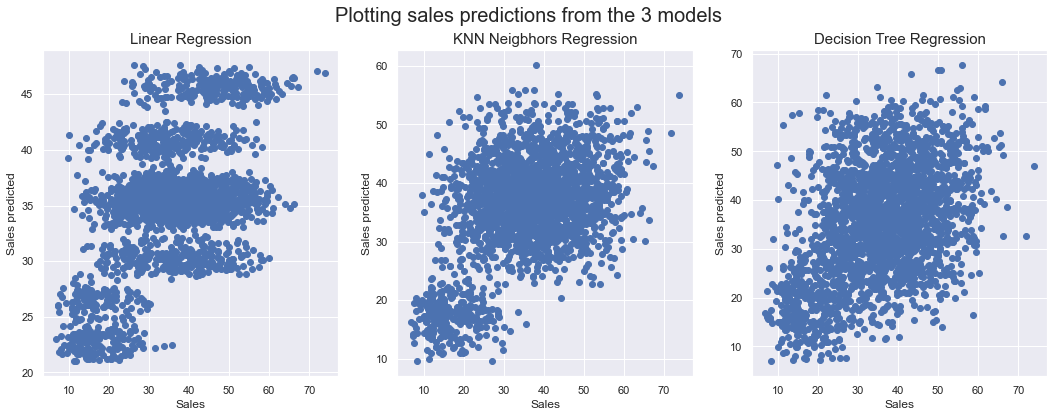

In [452]:
sns.set()
fig, ((ax1,ax2,ax3))= plt.subplots(1,3,figsize=(18,6),sharex=True)
fig.suptitle('Plotting sales predictions from the 3 models'+"\n"+"\n", fontsize=20)
ax1.scatter(y_test_sales,pred1_sales)
ax1.set_title('Linear Regression',fontsize=15)
ax1.set(xlabel='Sales', ylabel='Sales predicted')

ax2.scatter(y_test_sales,pred2_sales)
ax2.set_title('KNN Neigbhors Regression',fontsize=15)
ax2.set(xlabel='Sales', ylabel='Sales predicted')

ax3.scatter(y_test_sales,pred3_sales)
ax3.set_title('Decision Tree Regression',fontsize=15)
ax3.set(xlabel='Sales', ylabel='Sales predicted')

In [453]:
from sklearn.metrics import mean_squared_error

In [454]:
score1 = mean_squared_error(y_test_sales, pred1_sales)
score2 = mean_squared_error(y_test_sales, pred2_sales)
score3 = mean_squared_error(y_test_sales, pred3_sales)

In [455]:
print(score1,score2,score3)

104.52993836330094 118.53456688969929 153.76968997596418


Check R² for Linear Regression

In [456]:
import sklearn.metrics

In [457]:
pred1_sales_train=model1_sales.predict(X_train_sales)

In [458]:
sklearn.metrics.r2_score(y_train_sales,pred1_sales_train)

0.24443304019101197

In [461]:
sklearn.metrics.r2_score(y_test_sales,pred1_sales)

0.2615646369794453

Reduce number of variables 

In [460]:
from sklearn.feature_selection import RFE

In [462]:
selector_sales = RFE(model1_sales, 3, step=1)
selector_sales = selector_sales.fit(X_train_sales, y_train_sales)
selector_sales.support_

array([False,  True, False, False,  True,  True])

In [463]:
selector_sales.ranking_

array([2, 1, 4, 3, 1, 1])

In [465]:
X_train_sales.head() #means we can keep item visibility, outlet location, outlet type

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
4153,1,-1.905152,0,5,2,0
1047,0,-1.489386,7,6,0,1
7223,0,-2.324814,14,7,2,1
4354,0,-1.843316,8,8,2,3
7520,0,-2.073812,14,3,1,1


In [467]:
df2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,-2.689969,4,4,0,1,46.899886
1,1,-2.616090,14,0,2,2,20.924935
2,0,-2.672741,10,4,0,1,37.885135
6,1,-2.778659,13,7,2,1,18.911968
7,0,-1.648310,13,8,2,3,48.194730


In [468]:
df4=df2.drop(["Item_Fat_Content","Item_Type","Outlet_Establishment_Year"],axis=1)

In [469]:
X_train2_sales, X_test2_sales, y_train2_sales, y_test2_sales = train_test_split(df4.drop("Item_Outlet_Sales",axis=1),df4.Item_Outlet_Sales, test_size=0.3,random_state=42)

In [472]:
model1_sales2= LinearRegression()
model1_sales2.fit(X_train2_sales, y_train2_sales)
pred1_sales2=model1_sales2.predict(X_test2_sales)

In [477]:
pred1_sales2_train=model1_sales2.predict(X_train2_sales)

In [478]:
sklearn.metrics.r2_score(y_train2_sales,pred1_sales2_train)

0.23542528004518115

In [476]:
sklearn.metrics.r2_score(y_test2_sales,pred1_sales2)

0.2602741622589716

[Text(0, 0.5, 'Sales predicted'), Text(0.5, 0, 'Sales')]

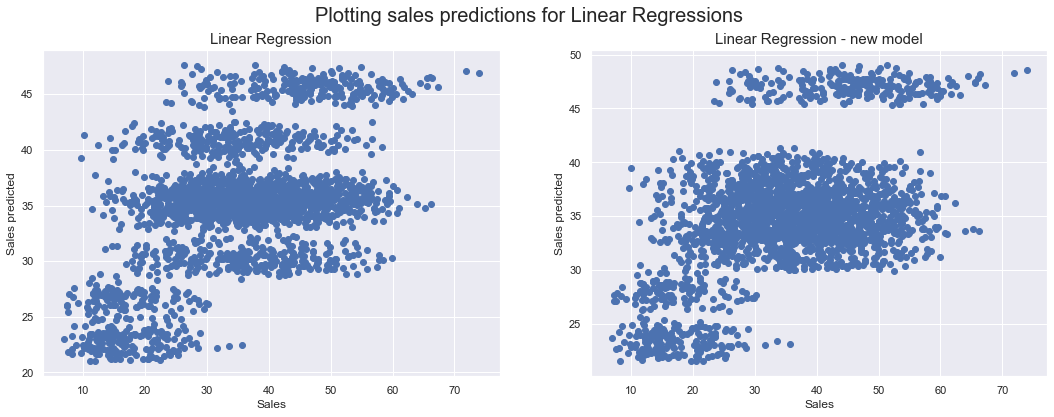

In [474]:
fig, ((ax1,ax2))= plt.subplots(1,2,figsize=(18,6))
fig.suptitle('Plotting sales predictions for Linear Regressions'+"\n"+"\n", fontsize=20)

ax1.scatter(y_test_sales,pred1_sales)
ax1.set_title('Linear Regression',fontsize=15)
ax1.set(xlabel='Sales', ylabel='Sales predicted')

ax2.scatter(y_test2_sales,pred1_sales2)
ax2.set_title('Linear Regression - new model',fontsize=15)
ax2.set(xlabel='Sales', ylabel='Sales predicted')